A one-dimensional periodic flow in a fluid has velocity $u$ in the $x$-direction only, given by
\begin{equation}
    u = \alpha\cos{k(x − ct)}.
\end{equation}
A material fluid element subject to this motion will have trajectory $X(t)$ satisfying
\begin{equation}
    \frac{dX}{dt} = \alpha\cos k(X(t) − ct).
\end{equation}

We can define a characteristic length $L$ and a characteristic time $T$ for the system and define new dimensionless quantities $X' = X/L$ and $t' = t/T$. Then the new derivatives can be computed using the chain rule,
\begin{equation}
    \frac{dX}{dt} = \frac{d(LX')}{d(Tt')} = \frac{L}{T}\frac{dX'}{dt'}.
\end{equation}
Substitute into the original equation to get
\begin{equation}
    \frac{L}{T} \frac{dX'}{dt'} = \alpha \cos k(LX' - cTt').
\end{equation}
We can factor $kL$ out of the cosine term
\begin{equation}
    \frac{dX'}{dt'} = \alpha\frac{T}{L}\cos[kL(X' - (cT/L)t')].
\end{equation}
Choose the characteristic wavelength to be $L = 2\pi/k$ and the characteristic time to be $T = L/c = 2\pi/(kc)$. Then $k=2\pi$ and $c=1$ which gives
\begin{equation}
    \frac{dX}{dt} = a\cos 2\pi(X(t) − t).
\end{equation}
By comparing the amplitude coefficients on the right-hand side of the equations, we have $a = \alpha (T/L) = a = \alpha / c$. The new dimensionless amplitude $a$ represents the ratio of the maximum fluid velocity $\alpha$ to the wave propagation speed $c$.

Set $X(0) = 0$. The following program is a numerical solver for this IVP.

In [25]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def fluid_trajectory_ode(t, X, a):
    '''
    Defines the ordinary differential equation for the fluid element's trajectory.
    '''
    return a * np.cos(2 * np.pi * (X - t))

def solve_trajectory(ode_func, a_val, X0, t_span, t_eval, tol=1e-8):
    return solve_ivp(
        ode_func,
        t_span,
        X0,
        args=(a_val,),
        dense_output=True,
        t_eval=t_eval,
        atol=tol,
        rtol=tol
    )

def plot_solutions(solutions_data, title):
    '''
    Generates a plot from a list of solved trajectories.
    Args:
        solutions_data: A list of dictionaries, each containing the time points ('t'),
                        position points ('y'), and a 'label' for the legend.
        title: The title for the plot.
    '''
    plt.figure(figsize=(8, 5))

    for data in solutions_data:
        plt.plot(data['t'], data['y'], label=data['label'])

    plt.title(title)
    plt.xlabel('Time (t)')
    plt.ylabel('Position X(t)')
    plt.legend()
    plt.grid(True)
    plt.show()

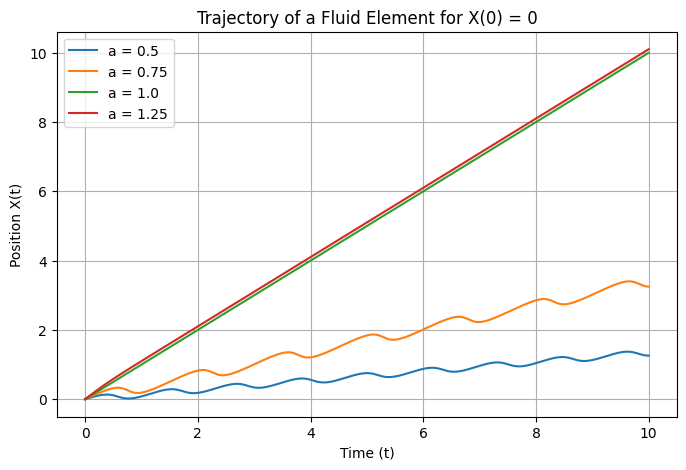

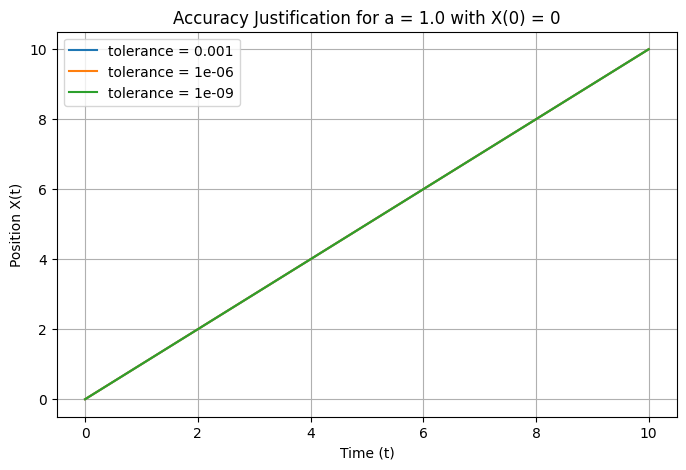

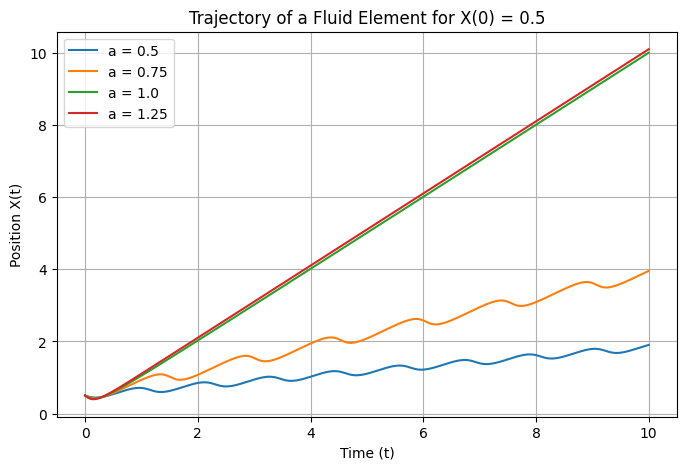

In [26]:
# Parameters
T_SPAN = [0, 10]
T_EVAL = np.linspace(T_SPAN[0], T_SPAN[1], 500)
A_VALUES = [0.5, 0.75, 1.0, 1.25]

X0_ZERO = [0]
solutions_x0_zero = [
    solve_trajectory(fluid_trajectory_ode, a, X0_ZERO, T_SPAN, T_EVAL)
    for a in A_VALUES
]
plot_data_x0_zero = [
    {'t': sol.t, 'y': sol.y[0], 'label': f'a = {a}'}
    for a, sol in zip(A_VALUES, solutions_x0_zero)
]
plot_solutions(plot_data_x0_zero, 'Trajectory of a Fluid Element for X(0) = 0')

A_TEST = 1.0
TOLERANCES = [1e-3, 1e-6, 1e-9]
solutions_accuracy = [
    solve_trajectory(fluid_trajectory_ode, A_TEST, X0_ZERO, T_SPAN, T_EVAL, tol=tol)
    for tol in TOLERANCES
]
plot_data_accuracy = [
    {'t': sol.t, 'y': sol.y[0], 'label': f'tolerance = {tol}'}
    for tol, sol in zip(TOLERANCES, solutions_accuracy)
]
plot_solutions(plot_data_accuracy, f'Accuracy Justification for a = {A_TEST} with X(0) = 0')

X0_NONZERO = [0.5]
solutions_x0_nonzero = [
    solve_trajectory(fluid_trajectory_ode, a, X0_NONZERO, T_SPAN, T_EVAL)
    for a in A_VALUES
]
plot_data_x0_nonzero = [
    {'t': sol.t, 'y': sol.y[0], 'label': f'a = {a}'}
    for a, sol in zip(A_VALUES, solutions_x0_nonzero)
]
plot_solutions(plot_data_x0_nonzero, f'Trajectory of a Fluid Element for X(0) = {X0_NONZERO[0]}')


The behavior of the fluid element's trajectory $X(t)$ is dependent on the value of the parameter $a$.

*   Case 1: $a < 1$: The fluid element exhibits an oscillatory motion with a small drift in the positive direction.
*   Case 2: $a = 1$: In this critical case, the fluid element moves steadily in the positive direction without oscillation.
*   Case 3: $a > 1$: The velocity is always positive, leading to a continuous and more rapid movement in the positive direction.

The qualitative behavior of the solutions for non-zero initial condition remains the same as in the $X(0) = 0$ case. The primary difference is a phase shift in the trajectory.